<a href="https://colab.research.google.com/github/deepakkhokhar1313/Deep-Learning-Code/blob/master/Credit_Card_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.duplicated().sum()

0

In [11]:
# To check whether data is classified well like all output catgeories have same number of training data
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
# To check number of categories in Geography Column
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
# To check how many gender class are present
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
# To remove unwanted Columns from dataset
# inplace True means changes will be saved in dataSet
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace= True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# To do Hot Encoding of Categorical columns
df = pd.get_dummies(df, columns=['Geography', 'Gender'])

In [16]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Exited'])
Y = df['Exited']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 1)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.fit_transform(X_test)

In [19]:
X_train_Scaled

array([[-0.23082038, -0.94449979, -0.70174202, ..., -0.57273139,
        -0.91509065,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.57273139,
         1.09278791, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ..., -0.57273139,
         1.09278791, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.57273139,
         1.09278791, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.57273139,
         1.09278791, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ..., -0.57273139,
        -0.91509065,  0.91509065]])

In [20]:
# Libraries for Training the Model
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
# First Layer is connected to inputs So we have to mention the input dimension
X_train.shape

(8000, 13)

In [22]:
model = Sequential()
model.add(Dense(3, activation = 'sigmoid', input_dim = 13))
model.add(Dense(1, activation = 'sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 42        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 46 (184.00 Byte)
Trainable params: 46 (184.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
#model.compile(loss='binary_crossentropy', optimizer='Adam')
# We can check Acuracy metrics along with traing using validation test data and setting metrics for accuracy at the time of compile
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics= ['accuracy'])

In [25]:
# model.fit(X_train_Scaled, Y_train, epochs=10)
# Here we have to split the data in vaidation set
history = model.fit(X_train_Scaled, Y_train, epochs=10, validation_split=0.2)
# Here if training accuracy(accuracy) is more than validation accuracy(val_accuracy) than it can be Overfitting Case
#history variable will be a dictionay here So we can store intermediate results in it and these Results can be used to plot the graphs of loss curve and accuracy curve

Epoch 1/10
200/200 [==============================] - 3s 4ms/step - loss: 0.5928 - accuracy: 0.7434 - val_loss: 0.5556 - val_accuracy: 0.7975
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5246 - accuracy: 0.7972 - val_loss: 0.5069 - val_accuracy: 0.7975
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4884 - accuracy: 0.7972 - val_loss: 0.4807 - val_accuracy: 0.7975
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4675 - accuracy: 0.7972 - val_loss: 0.4650 - val_accuracy: 0.7975
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4542 - accuracy: 0.7972 - val_loss: 0.4543 - val_accuracy: 0.7975
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4452 - accuracy: 0.7972 - val_loss: 0.4468 - val_accuracy: 0.7975
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4390 - accuracy: 0.7972 - val_loss: 0.4418 - val_accuracy: 0.7975
Epoch 

In [26]:
# To get the Weights and bias of Layer wise
model.layers[0].get_weights()
#This function shows the values of all Weights and Bias of particular indexed Layer

[array([[-0.17603146,  0.2469401 ,  0.00916843],
        [-1.7163507 , -1.4189289 ,  0.28269827],
        [ 0.03064803,  0.10142184,  0.30172879],
        [-0.33453953, -0.14808542,  0.31586078],
        [-0.06993559,  0.21513504,  0.17121871],
        [-0.08372317,  0.12872548, -0.04456237],
        [ 0.9176199 ,  0.3823002 , -1.2164717 ],
        [-0.19045721, -0.15129735, -0.25223532],
        [ 0.24219127,  0.1493513 , -0.69472164],
        [-0.78483474, -0.17044073,  0.2729865 ],
        [ 0.27162626,  0.188092  ,  0.0294909 ],
        [-0.06065798, -0.22714302,  0.43686703],
        [ 0.17841733,  0.2984241 ,  0.17580469]], dtype=float32),
 array([ 0.51561964,  0.36610636, -0.27052397], dtype=float32)]

In [27]:
#Pridiction
# As we are using Sigmoid activation function So it is showing probabilties instead of 0 Or 1
model.predict(X_test_Scaled)

63/63 [==============================] - 0s 3ms/step


array([[0.12600799],
       [0.12588257],
       [0.15670593],
       ...,
       [0.07436575],
       [0.14723328],
       [0.37350512]], dtype=float32)

In [28]:
# To convert it into 0 Or 1 we can set a thersold for this

Y_log = model.predict(X_test_Scaled)

Y_pred = np.where(Y_log > 0.5, 1, 0)
Y_pred

63/63 [==============================] - 0s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [29]:
# Now we have Y-pred So now we can check accuracy of our model
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8015

In [30]:
import matplotlib.pyplot as plt


In [31]:
history.history

{'loss': [0.5928469300270081,
  0.5245655179023743,
  0.48838937282562256,
  0.46751829981803894,
  0.4541667699813843,
  0.4451935291290283,
  0.4389716684818268,
  0.43453553318977356,
  0.43134161829948425,
  0.4288999140262604],
 'accuracy': [0.7434375286102295,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7979687452316284,
  0.8023437261581421],
 'val_loss': [0.5556499361991882,
  0.5069231390953064,
  0.4806762635707855,
  0.46497976779937744,
  0.45428216457366943,
  0.44682765007019043,
  0.4417780935764313,
  0.4380444586277008,
  0.435221791267395,
  0.4330136179924011],
 'val_accuracy': [0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.8018749952316284,
  0.8075000047683716]}

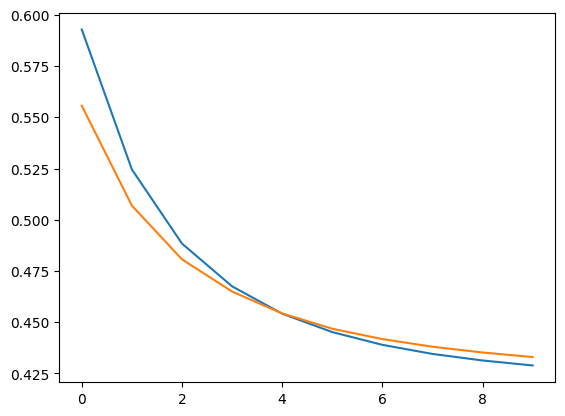

In [32]:
#Plot different graphs using History

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

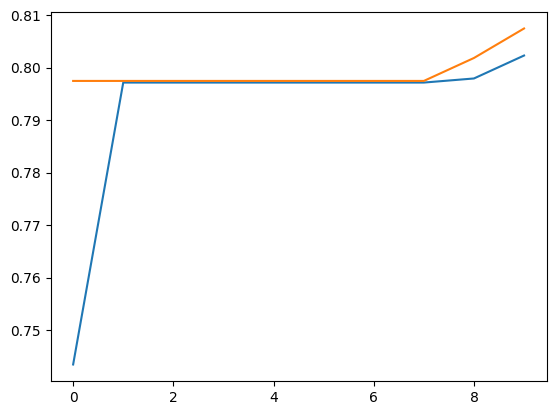

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])